### Подключение модулей

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import tensorflow as tf
from tensorflow import keras

Целью этого проекта является прогнозирование и анализ цен продажи жилья в США. Требуется построить регрессионную модель для прогнозирования цен на жилье в США на основе различных факторов.


### Загрузка данных

In [5]:
df = pd.read_csv('USA_Housing.csv')

In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Данные содержат следующие столбцы:
- __Avg. Area Income__ (Сред. Доход от района): Средний доход жителей города по региону.
- __Avg. Area House Age__ (Сред. Площадь дома): Средний возраст домов в районе.
- __Avg. Area Number of Rooms__ (Сред. Площадь Количество комнат): Среднее количество комнат в домах в том же городе.
- __Avg. Area Number of Bedrooms__ (Сред. Площадь Количество спален): Среднее количество спален в домах в том же городе.
- __Area Population__ (Население региона): Население городского дома, в котором находится.
- __Price__ (Цена): Цена, по которой был продан дом.
- __Address__ (Адрес): Адрес дома.
    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [10]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000
mean,68583.1090,5.9772,6.9878,3.9813,36163.5160,1232072.6541
std,10657.9912,0.9915,1.0058,1.2341,9925.6501,353117.6266
min,17796.6312,2.6443,3.2362,2.0000,172.6107,15938.6579
25%,61480.5624,5.3223,6.2993,3.1400,29403.9287,997577.1350
50%,68804.2864,5.9704,7.0029,4.0500,36199.4067,1232669.3780
75%,75783.3387,6.6508,7.6659,4.4900,42861.2908,1471210.2042
max,107701.7484,9.5191,10.7596,6.5000,69621.7134,2469065.5942


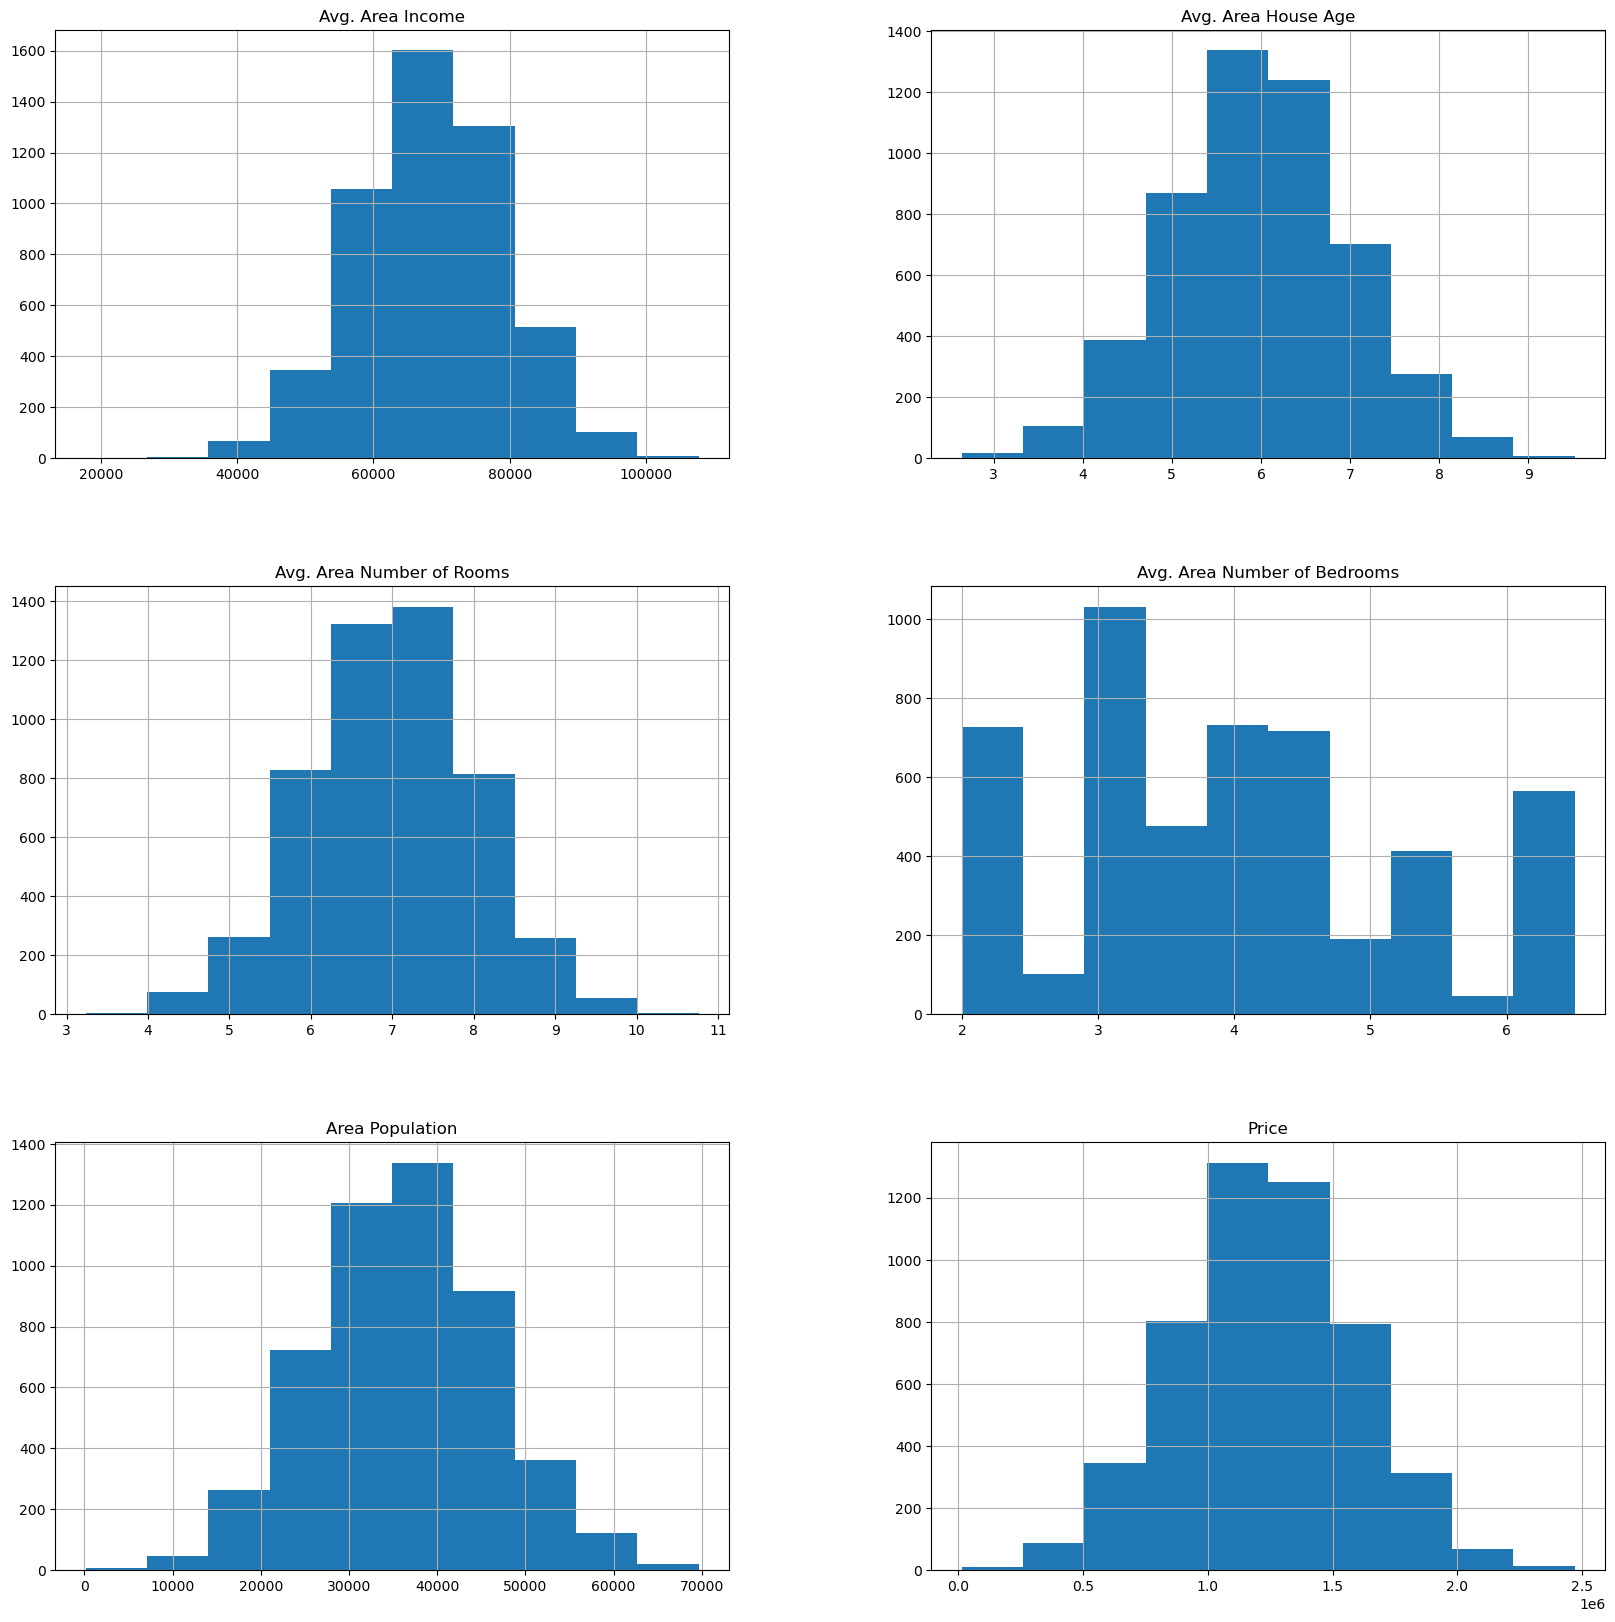

In [11]:
df.hist(figsize=(20,20));

<Figure size 800x600 with 0 Axes>

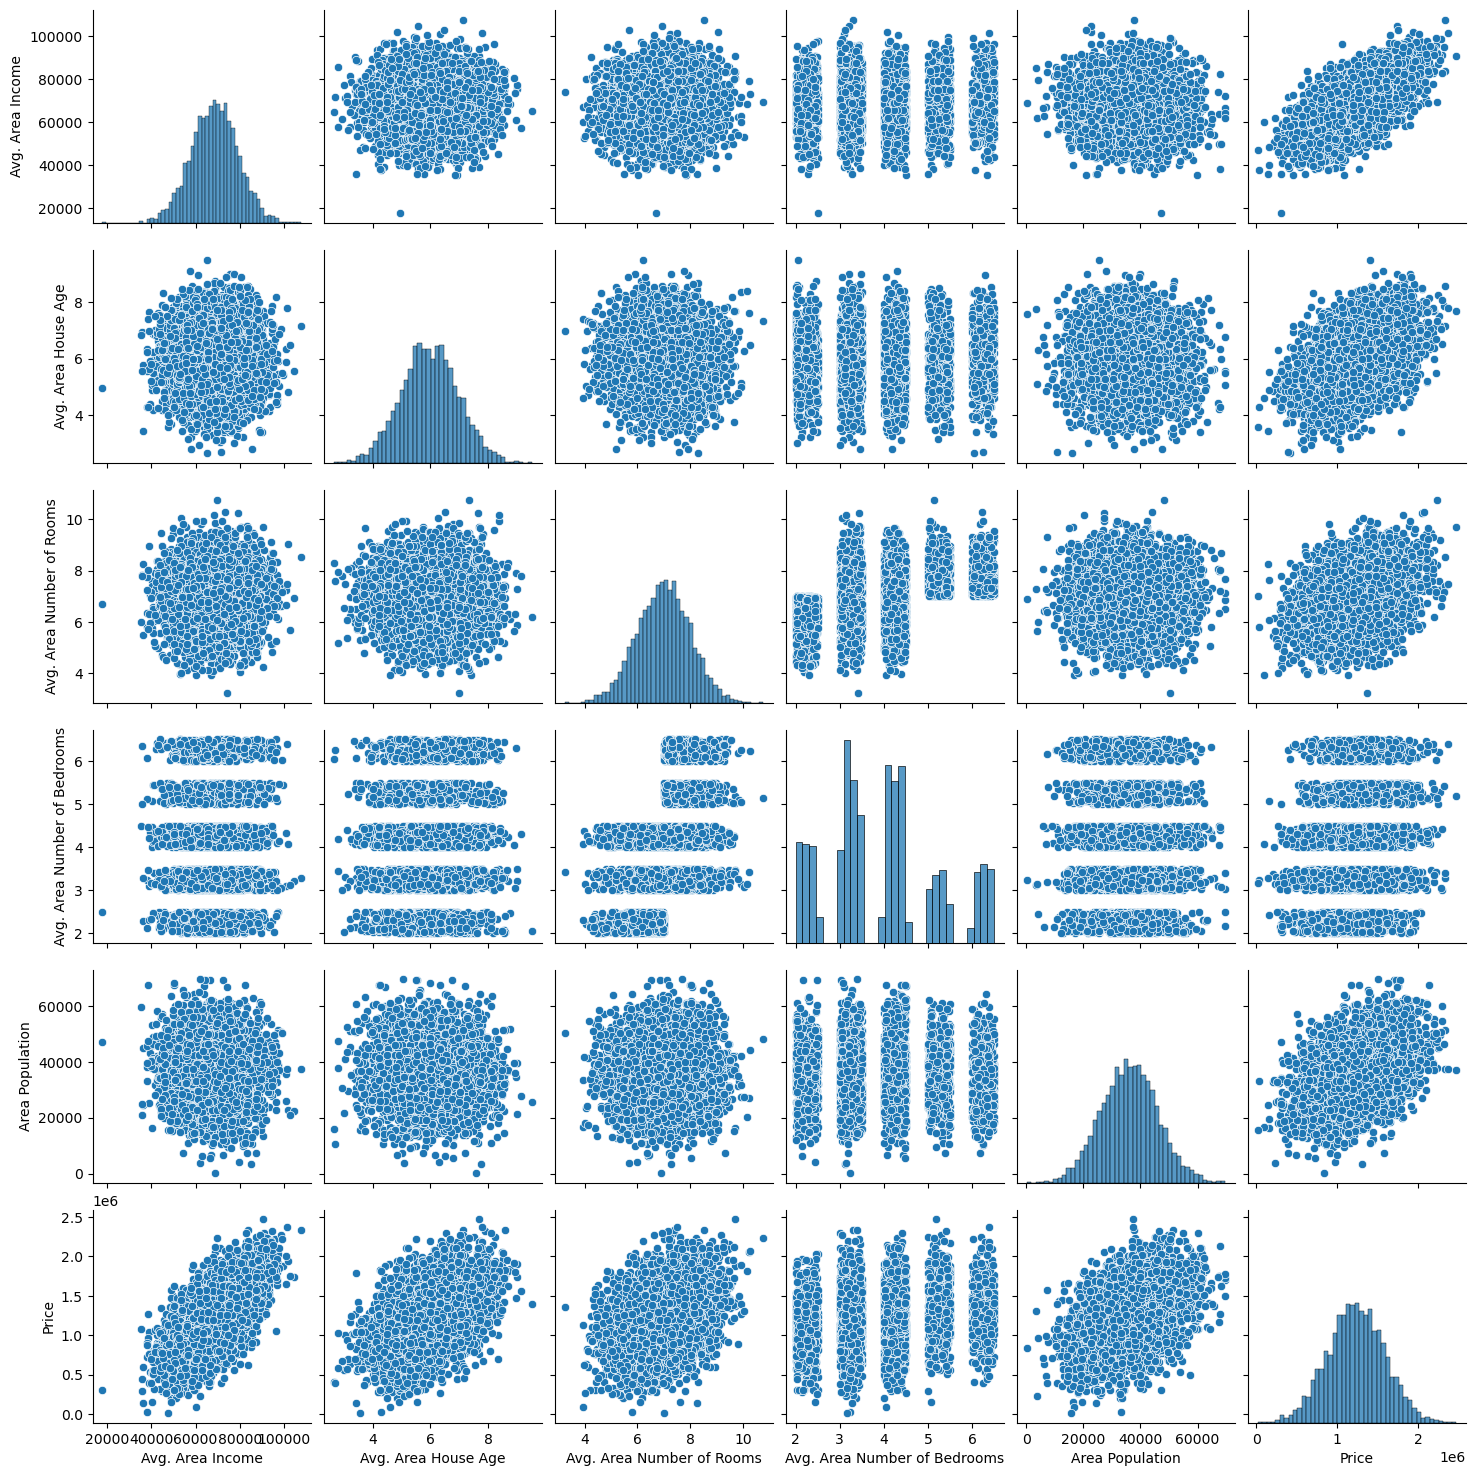

In [12]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

<Axes: xlabel='Price', ylabel='Density'>

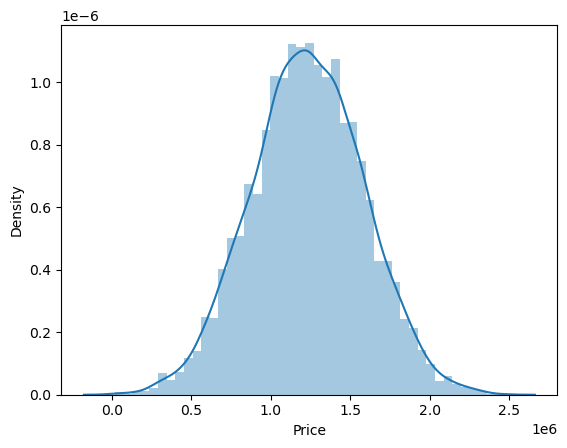

In [13]:
sns.distplot(df['Price'])

<Axes: xlabel='Avg. Area Income', ylabel='Price'>

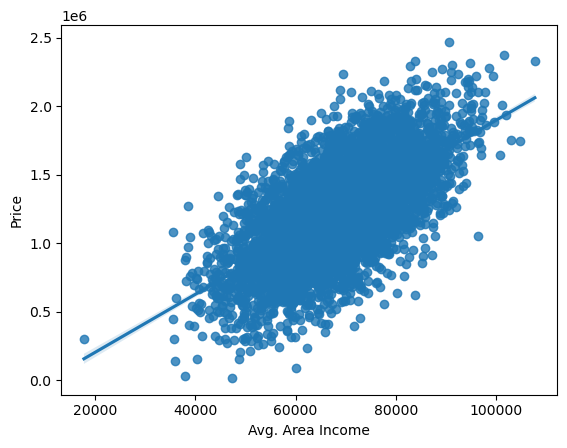

In [14]:
sns.regplot(y='Price', x='Avg. Area Income', data=df)

In [15]:
df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.0000,-0.0020,-0.0110,0.0198,-0.0162,0.6397
Avg. Area House Age,-0.0020,1.0000,-0.0094,0.0061,-0.0187,0.4525
Avg. Area Number of Rooms,-0.0110,-0.0094,1.0000,0.4627,0.0020,0.3357
Avg. Area Number of Bedrooms,0.0198,0.0061,0.4627,1.0000,-0.0222,0.1711
Area Population,-0.0162,-0.0187,0.0020,-0.0222,1.0000,0.4086
Price,0.6397,0.4525,0.3357,0.1711,0.4086,1.0000


<Axes: >

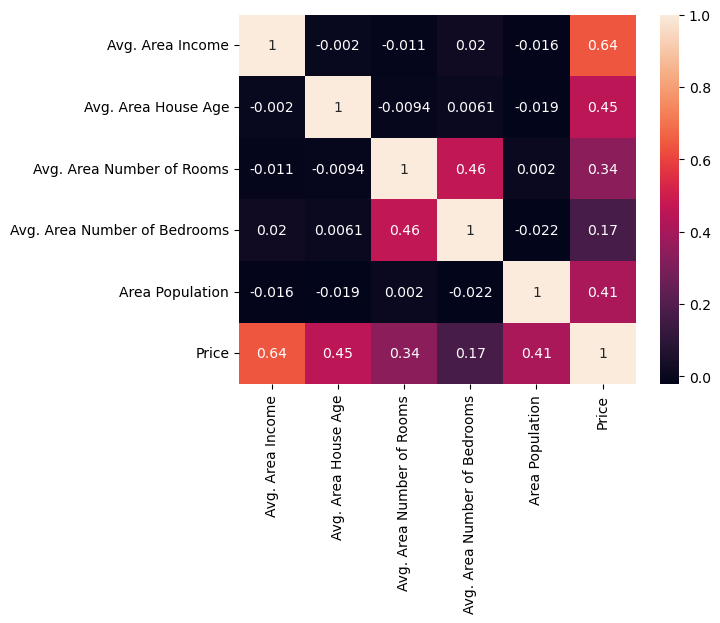

In [16]:
sns.heatmap(df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr(), annot=True)

In [17]:
df['House Age'] = df['Avg. Area House Age'].apply(int)

<Axes: xlabel='House Age', ylabel='Price'>

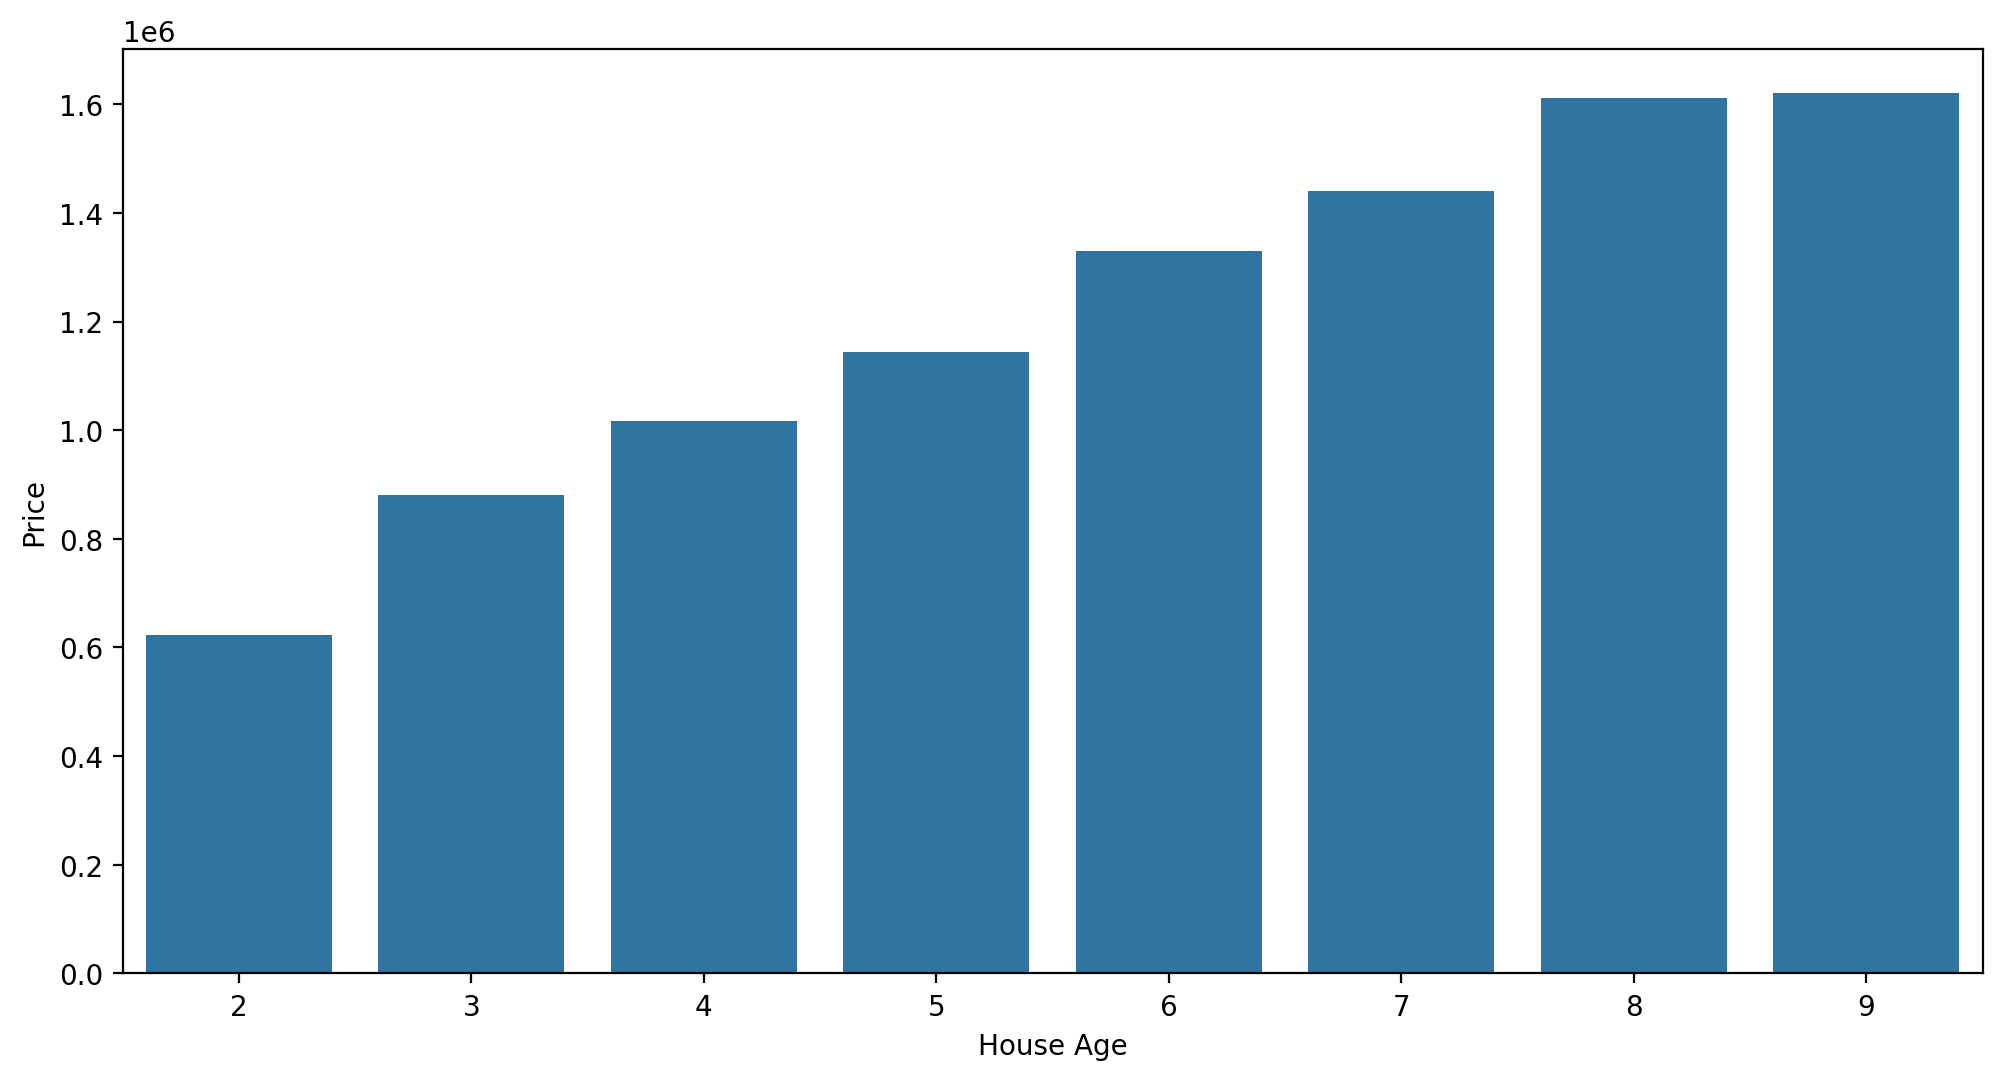

In [18]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'House Age', y = 'Price', data = df, ci = None)

In [19]:
df['Number of Rooms'] = df['Avg. Area Number of Rooms'].apply(int)

<Axes: xlabel='Number of Rooms', ylabel='Price'>

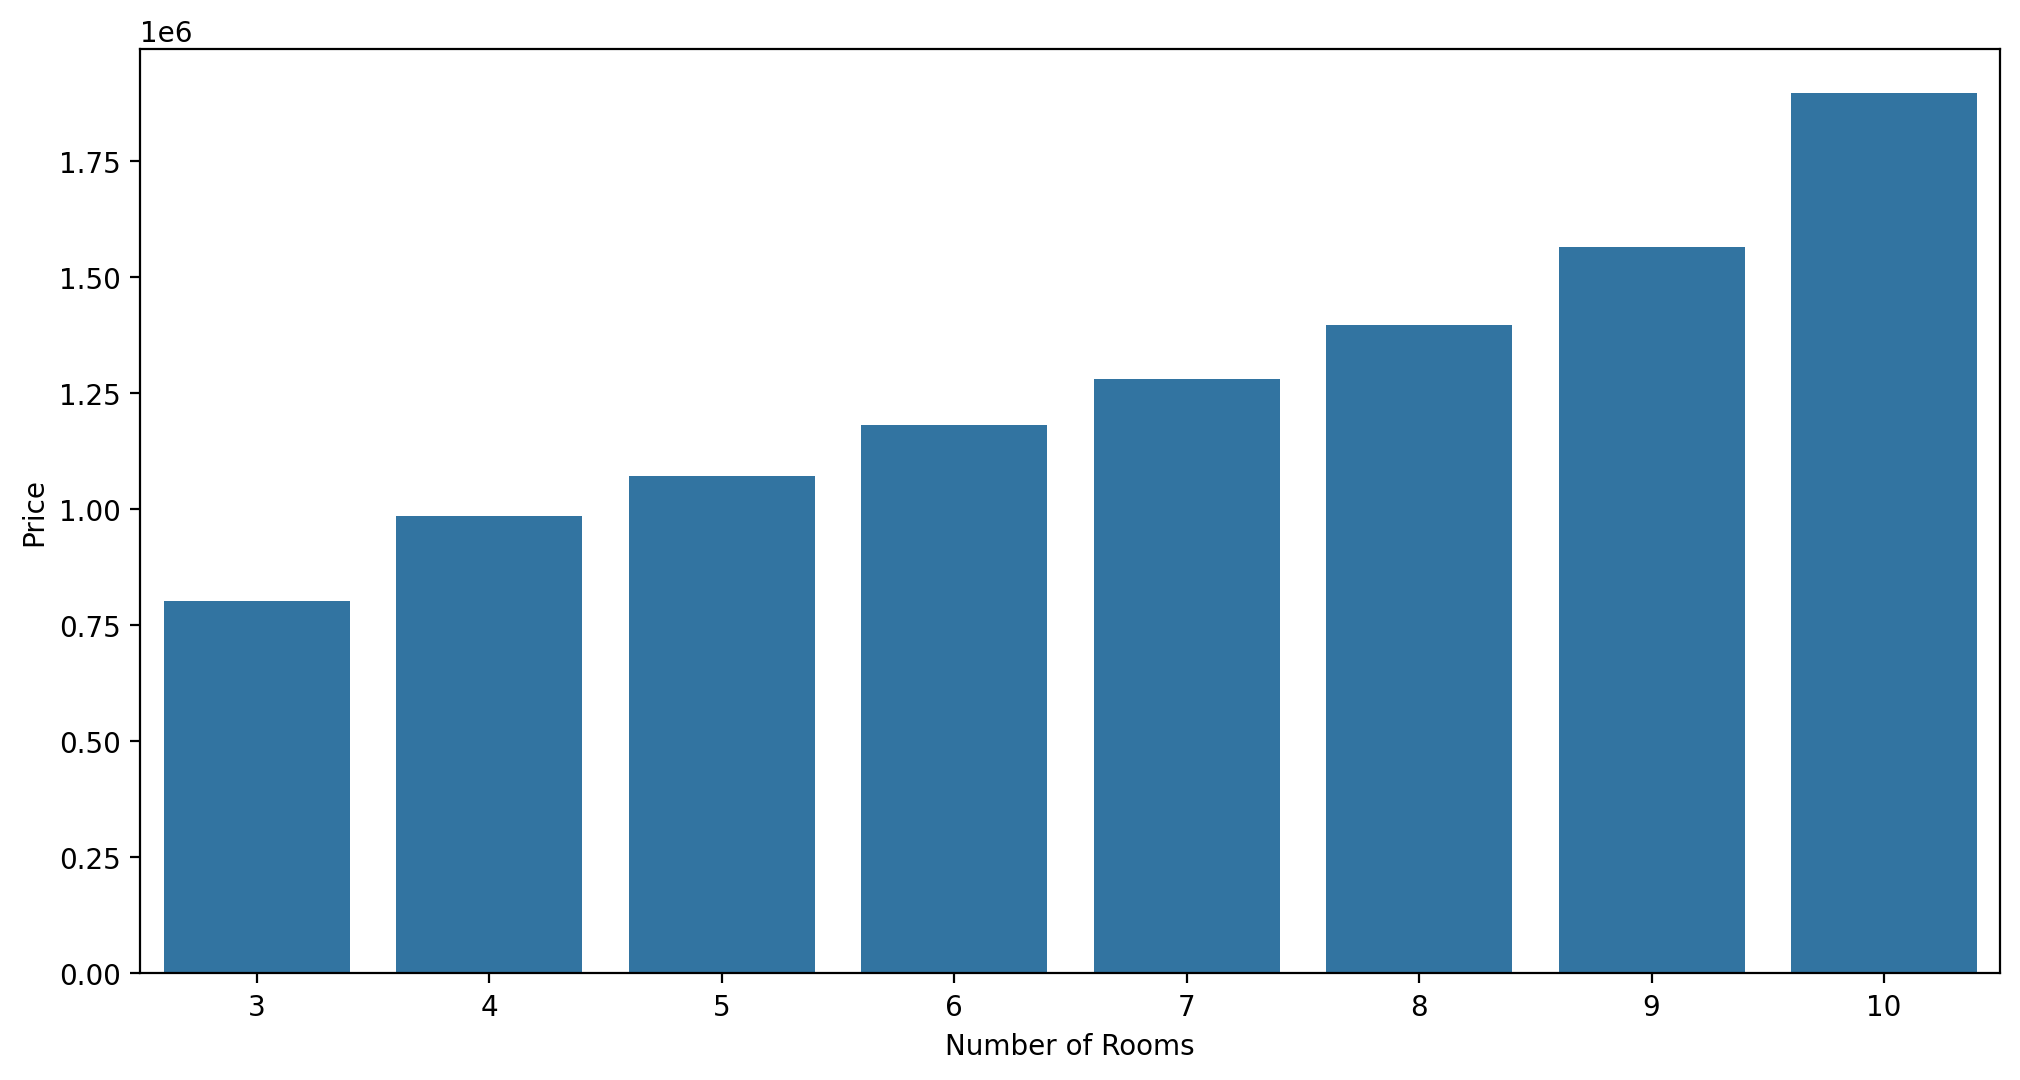

In [20]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Rooms', y = 'Price', data = df, ci = None)

In [21]:
df['Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].apply(int)

<Axes: xlabel='Number of Bedrooms', ylabel='Price'>

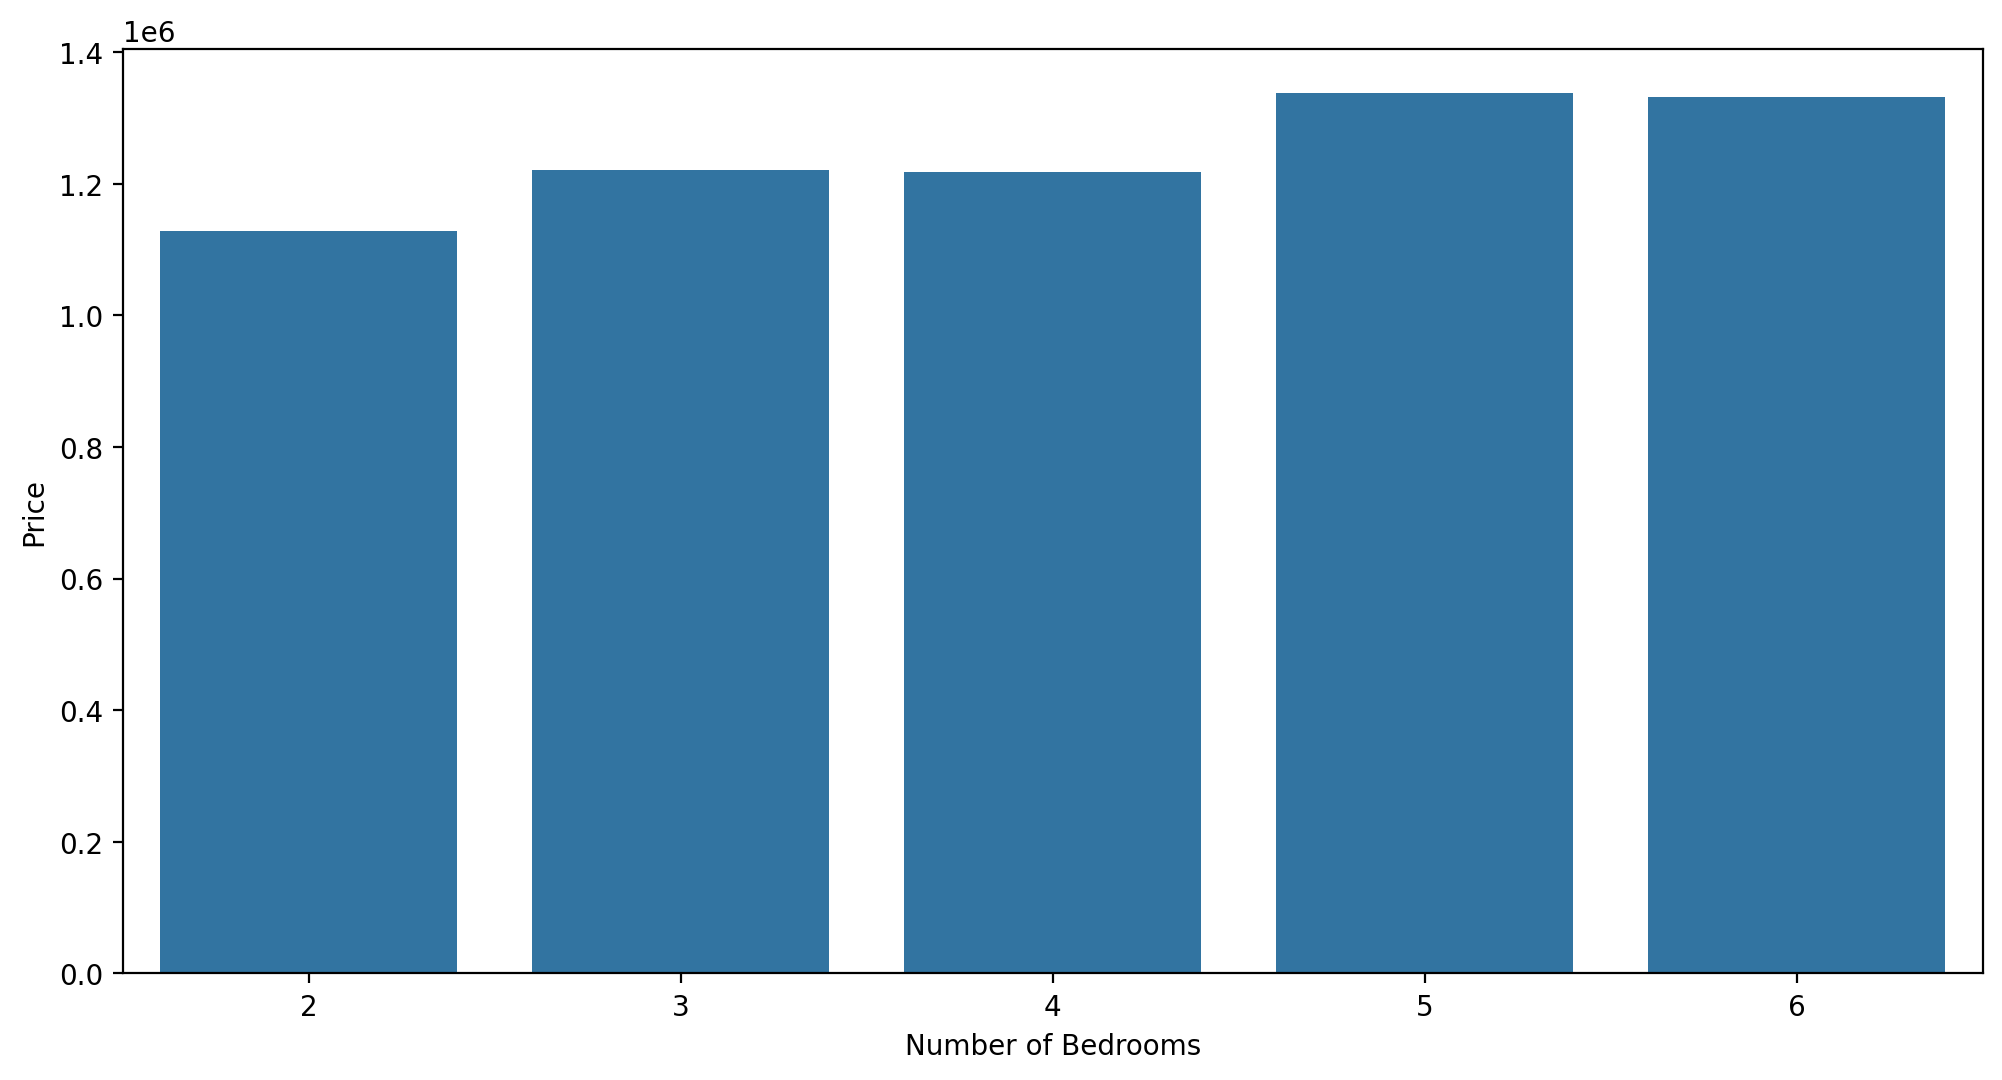

In [22]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Bedrooms', y = 'Price', data = df, ci = None)

### Обучение модели линейной регрессии

In [23]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'House Age', 'Number of Rooms', 'Number of Bedrooms'],
      dtype='object')

In [24]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [25]:
y = df['Price']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Линейная регрессия

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
lrm.intercept_

np.float64(-2638673.4261905826)

In [31]:
lrm.coef_

array([2.16257989e+01, 1.65590393e+05, 1.19827783e+05, 2.36109526e+03,
       1.52165814e+01])

In [32]:
predictions = lrm.predict(X_test)

In [33]:
predictions

array([1308536.13592605, 1237122.72746462, 1243835.62817079, ...,
       1457119.79297226, 1483428.95309313, 1047510.59737201],
      shape=(1500,))

In [34]:
y_test.round(3)

1501   1339096.0770
2586   1251794.1790
2653   1340094.9660
1055   1431507.6230
705    1042373.5240
           ...     
3563   1348221.7650
1538   1309937.3990
1837   1472887.2470
2380   1409762.1190
1912   1009606.2840
Name: Price, Length: 1500, dtype: float64

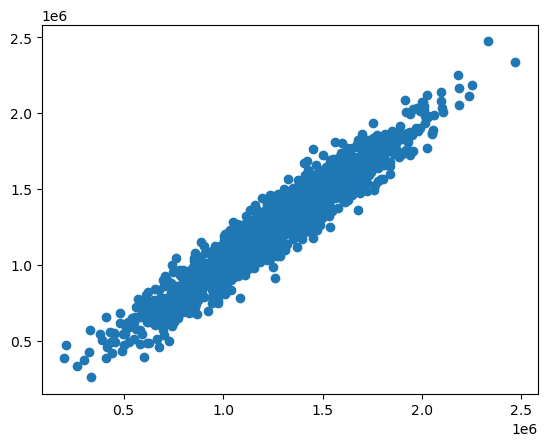

In [35]:
plt.scatter(y_test, predictions)

<Axes: xlabel='Price'>

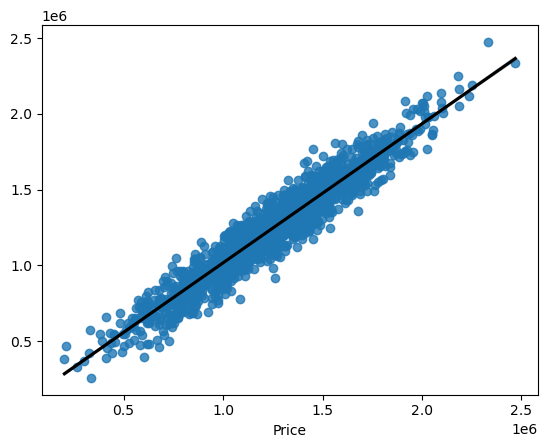

In [36]:
sns.regplot(x=y_test,y=predictions,line_kws={"color":"black"})

<Axes: xlabel='Price', ylabel='Density'>

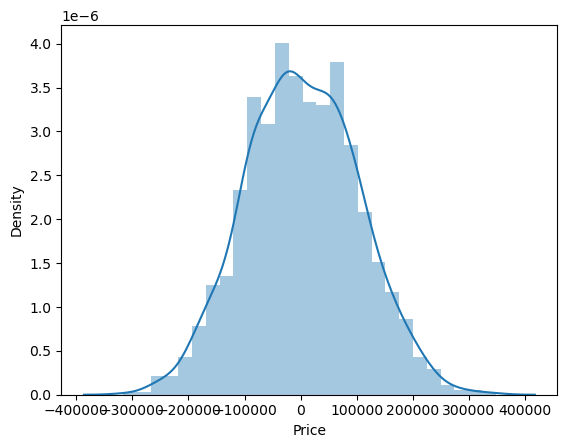

In [37]:
sns.distplot((y_test - predictions))

### Метрики оценки качества регрессии


Общие показатели оценки для задач регрессии:

**Mean Absolute Error** (MAE Средняя абсолютная ошибка) - это среднее значение абсолютного значения ошибок:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE Среднеквадратическая ошибка) - это среднее значение квадратов ошибок:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE Среднеквадратическая ошибка) - это квадратный корень из среднего квадрата ошибок:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Коэффициент детерминации** $R^{2}$

$$R^2 = 1 - \frac{\frac{1}{n}\sum^{n}_{i}{(y - y_{pred})^2}}{\frac{1}{n}\sum^{n}_{i}{(y - \bar{y})^2}}$$

In [38]:
from sklearn import metrics

In [39]:
metrics.mean_absolute_error(y_test, predictions)

81135.56609336883

In [40]:
metrics.mean_squared_error(y_test, predictions)

10068422551.400932

In [41]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

np.float64(100341.52954485462)

In [43]:
metrics.r2_score(y_test, predictions)

0.9146818498754011

## Jupyter notebook Regression_2026NN.ipynb загружает датасет USA_Housing.csv с 5000 записями о ценах на жилье в США и начинает EDA с помощью pandas. Данные чистые, без пропусков, с 6 числовыми признаками и адресом. Цель — регрессия цен с использованием Keras/TensorFlow,  задача для демонстрации нейронных сетей.
​

Статистика данных:
Датасет содержит средние районные характеристики: доход (mean 68583), возраст домов (mean 5.98 лет), комнаты (mean 6.99), спальни (mean 3.98), население (mean 36164), цена (mean 1.23M USD, std 353k). Диапазоны разумны: цены от 16k до 2.47M USD, доход до 107k.
​

Корреляции с ценой:
На основе первых строк, цена сильно коррелирует с населением (0.70) и возрастом домов (0.66), положительно с доходом (0.58), отрицательно с комнатами (-0.55) и спальнями (-0.61). Полная корреляционная матрица подтвердит лидеров для feature selection; ожидается доход и население как ключевыеJupyter notebook Regression_2026NN.ipynb загружает датасет USA_Housing.csv с 5000 записями о ценах на жилье в США и начинает EDA с помощью pandas. Данные чистые, без пропусков, с 6 числовыми признаками и адресом. Цель — регрессия цен с использованием Keras/TensorFlow, типичная задача для демонстрации нейронных сетей.
​

Корреляции с ценой:
На основе первых строк, цена сильно коррелирует с населением (0.70) и возрастом домов (0.66), положительно с доходом (0.58), отрицательно с комнатами (-0.55) и спальнями (-0.61). 




Данные уже разделены: X (5 признаков), y='Price', train/test 70/30 random_state=42. Добавим стандартизацию для NN.

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Все признаки равноправны
#Градиенты стабильны
#Каждая эпоха улучшает модель

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_train_scaled mean:", X_train_scaled.mean(axis=0).round(4))
print("X_train_scaled std:", X_train_scaled.std(axis=0).round(4))

X_train_scaled shape: (3500, 5)
X_train_scaled mean: [-0. -0.  0.  0. -0.]
X_train_scaled std: [1. 1. 1. 1. 1.]


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)  

lr_pred = lr.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print("LinearRegression:")
print(f"MAE: {lr_mae:.0f}")
print(f"RMSE: {lr_rmse:.0f}")
print(f"R²: {lr_r2:.4f}")


LinearRegression:
MAE: 81136
RMSE: 100342
R²: 0.9147


LinearRegression: сильный baseline (MAE 81k, RMSE 100k, R² +-0.915)

Добавляем ансамблевую модель (деревья решений) 


In [46]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)  

rf_pred = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("RandomForestRegressor:")
print(f"MAE: {rf_mae:.0f}")
print(f"RMSE: {rf_rmse:.0f}")
print(f"R²: {rf_r2:.4f}")

RandomForestRegressor:
MAE: 94724
RMSE: 119786
R²: 0.8784


RandomForest (100 деревьев) дал MAE 94k, RMSE 119k, R²=87.8% — 
хуже LinearRegression (R²=91.5%). Деревья переобучились на шум или нелинейности в данных переоценены.

LinearRegression лидирует — простая линия лучше ансамбля.  RF страдает от малого датасета (3500 train) или дефолтных параметров.

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from tensorflow.keras.layers import BatchNormalization

nn_v2 = Sequential([
    Dense(256, activation='relu', input_shape=(5,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

nn_v2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history_v2 = nn_v2.fit(X_train_scaled, y_train, epochs=300, batch_size=64, 
                      validation_split=0.2, callbacks=[early_stop], verbose=1)

nn_v2_pred = nn_v2.predict(X_test_scaled).flatten()
nn_v2_mae = mean_absolute_error(y_test, nn_v2_pred)
nn_v2_rmse = np.sqrt(mean_squared_error(y_test, nn_v2_pred))
nn_v2_r2 = r2_score(y_test, nn_v2_pred)

print("Neural Network v2 улучшил:")
print(f"MAE: {nn_v2_mae:.0f}")
print(f"RMSE: {nn_v2_rmse:.0f}")
print(f"R²: {nn_v2_r2:.4f}")


Epoch 1/300
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1635058450432.0000 - mae: 1227943.3750 - val_loss: 1637506875392.0000 - val_mae: 1228432.3750
Epoch 2/300
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1631106105344.0000 - mae: 1226374.3750 - val_loss: 1628876832768.0000 - val_mae: 1225058.5000
Epoch 3/300
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1613695942656.0000 - mae: 1219571.0000 - val_loss: 1599082070016.0000 - val_mae: 1213532.7500
Epoch 4/300
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1565156704256.0000 - mae: 1200667.7500 - val_loss: 1527002431488.0000 - val_mae: 1185539.8750
Epoch 5/300
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1462072770560.0000 - mae: 1159774.7500 - val_loss: 1385919021056.0000 - val_mae: 1129185.5000
Epoch 6/300
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1275548008448.0000 - mae: 1082713.5000 - val_loss: 1149869621248.0000 - val_mae: 1028558.4375
Epoch 7/300
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 990441242624.0000 - mae

<h1 id="final-results" align="center" style="color:#000000;background:#FFFACD;padding:18px;border-radius:15px 50px; font-family:newtimeroman;">
Итоговое сравнение моделей регрессии USA_Housing
</h1>

<h1 id="top-models" style="color:#000000;background:#FFFACD;padding:8px;border-radius:8px;font-family:newtimeroman;">
Результаты моделей
</h1>
<ul>
<li><b>LinearRegression</b> — <b>R²=91.47%</b>. MAE=$81k, RMSE=$100k. Простая линейная модель доминирует</li>
<li><b>Neural Network v2</b> — R²=91.32%. MAE=$81k, RMSE=$101k. Глубокая архитектура 256→128→64→32 + Dropout</li>
<li><b>RandomForest</b> — R²=87.84%. MAE=$95k, RMSE=$120k. Ансамбль 100 деревьев (переобучение)</li>
</ul>

<h1 id="key-conclusion" style="color:#000000;background:#FFFACD;padding:8px;border-radius:8px;font-family:newtimeroman;">
Основные выводы
</h1>
<ul>
<li>LinearRegression лидирует — данные линейно разделимы (доход+возраст+население)</li>
<li>Neural Network v2 близка (+0.18% разница), Dropout(0.3) стабилизировал глубокую архитектуру</li>
<li>RandomForest хуже всех — переобучение на малом датасете (5000 сэмплов)</li>
</ul>

<h2 style="color:#000000;background:#FFFACD;padding:8px;border-radius:8px;font-family:newtimeroman;">
Лучший выбор
</h2>
<p><b>LinearRegression</b> — <b>R²=91.47%</b> (самая точная + интерпретируемая)</p>

<h3 style="color:#000000;background:#F0F8FF;padding:12px;border-radius:8px;font-family:monospace;">
Лучшаая модель LinearRegression()
</h3>
